In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import common_func as cf

In [2]:
def fit_dist(data, method):
    if method == 'MOM':
        xbar, std, skew = cf.findmoments(data)
        sigma = np.log((std ** 2)/(xbar ** 2) + 1)
        mu = np.log(xbar) - 0.5 * sigma 
        return np.sqrt(sigma), 0, np.exp(mu)
    else:
        return ss.lognorm.fit(data,floc=0)


In [3]:
def qq_plot(maxQ):
    para_mom = fit_dist(maxQ, 'MOM')
    maxQ_sorted = sorted(maxQ)
    x = 1/len(maxQ)
    ppf = [x *i for i in range(len(maxQ))]
    m = ss.lognorm.cdf(maxQ_sorted, s= para_mom[0], scale = para_mom[2])
    rho = np.corrcoef(ppf, m)[0, 1]
    maxQ_ppf = ss.lognorm.ppf(ppf, s= para_mom[0], scale = para_mom[2])
    
    plt.figure(figsize=(10,7))
    hfont = {'fontname':'Times New Roman'}
    plt.scatter(maxQ_sorted,maxQ_ppf, color='b')
    plt.plot(maxQ_sorted, maxQ_sorted, color='r')
    plt.title('R$^2$:' + str((rho)))
    plt.xlabel('Observations', fontsize = 12, **hfont)
    plt.ylabel('Fitted values', fontsize = 12, **hfont)
    plt.show()
    return maxQ_sorted, ppf, m
    

In [4]:

def test_goodness(data):
    maxQ, yearMaxQ = cf.annual_max(data)
    para_mom = fit_dist(maxQ, 'MOM')
    para_mle = fit_dist(maxQ, 'MLE')
    
    # KS test
    ks_lognorm_mom = ss.stats.kstest(maxQ,'lognorm',(para_mom[0], 0, para_mom[2]))
    print('Log normal using MOM:',ks_lognorm_mom)
    ks_lognorm_mle = ss.stats.kstest(maxQ,'lognorm',(para_mle[0], 0, para_mle[2]))
    print('Log normal using MLE:',ks_lognorm_mle)
    
    maxQ_sorted, ppf, m = qq_plot(maxQ)
    plt.figure(figsize=(10,7))
    plt.hist(maxQ, density = True, bins=5)
    x= np.arange(min(maxQ), max(maxQ), 0.1)
    y1 = ss.lognorm.pdf(x, s = para_mom[0], scale = para_mom[2])
    y2 = ss.lognorm.pdf(x,s = para_mle[0],scale = para_mle[2])
    plt.plot(x,y1)
    plt.plot(x,y2)
    plt.show()
    
    # Q-Q  and CDF plots
   

    hfont = {'fontname':'Times New Roman'}
    plt.figure(figsize=(10,7))
    plt.plot(maxQ_sorted,ppf,color='b')
    plt.plot(maxQ_sorted,m, color='r')
    plt.xlabel('Annual maximum precipitation(inch)', fontsize = 12, **hfont)
    plt.ylabel('Cumulative probability', fontsize = 12, **hfont)
    plt.show()




Log normal using MOM: KstestResult(statistic=0.07867254316796879, pvalue=0.7269309424233992)
Log normal using MLE: KstestResult(statistic=0.08298852931215711, pvalue=0.6650820916718099)


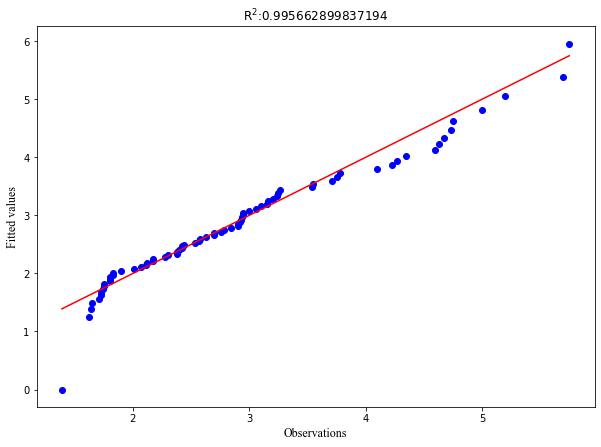

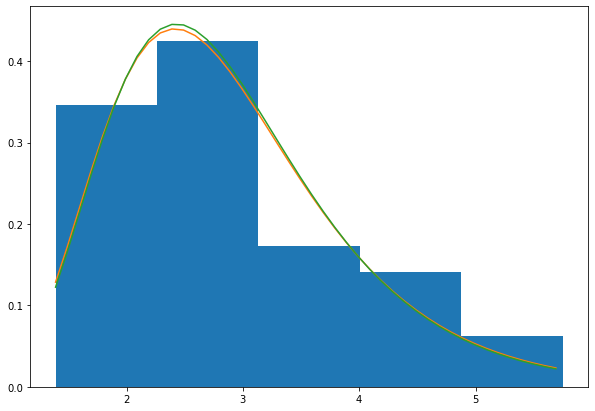

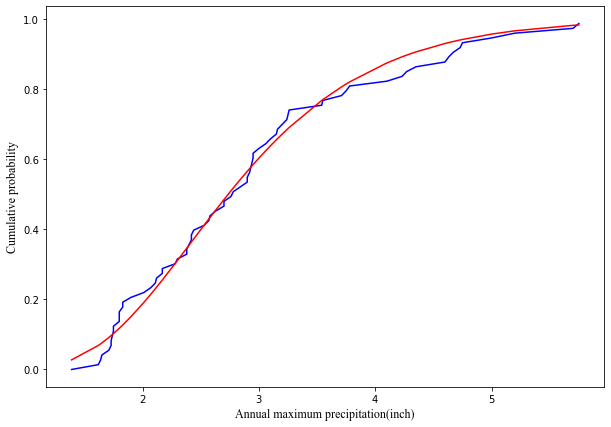

In [5]:
Data = pd.read_csv('precip.csv')
test_goodness(Data)